# Tarea 4

## Mario Vicuña

### Utilidades

*Este notebook está pensado para correr en Google Colaboratory*

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics as stat
from sklearn.metrics import accuracy_score

# Clases necesarias para cargar los datos de MNIST
from torchvision.datasets import MNIST
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor
from sklearn.model_selection import train_test_split

# Para descargar gráficos desde Colaboratory
import os
from google.colab import files


# Otros
dpi = 250
seed = 1138
np.random.seed(seed)

# Contexto Notebook y escala de fuente
sns.set_context('notebook', font_scale=1.4)

# Estilo, fondo blanco con 'ticks' en los ejes
sns.set_style('ticks')

# Instalar PyTorch en caso de ser necesario
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-1.1.0-{platform}-linux_x86_64.whl torchvision
!pip install -q ipdb

import torch
import math
import copy
print('Ready')

if torch.cuda.is_available():
    inGPU = True
    print('GPU available')
    #device = torch.device("cuda:0")
    print('Device:', torch.device('cuda:0'))
else:
    inGPU = False

Ready
GPU available
Device: cuda:0


In [0]:
os.chdir('/content')
try:
  shutil.rmtree('./Models', ignore_errors=True)
  os.makedirs('./Models')
  
  shutil.rmtree('./Plots', ignore_errors=True)
  os.makedirs('./Plots')
except Exception:
  pass

modelFolder = '/content/Models/'
plotFolder = '/content/Plots/'

# Redes Neuronales

## P1) Clasificación con  Redes Neuronales

Se pretende realizar la tarea de clasificación sobre el *detaset* *MNIST*, usando Redes Neuronales (*NN*) como clasificador, para esto:



a)    Cargue los datos (ver el demo para cargarlos) y sepárelos de forma aleatoria en conjuntos de entrenamiento ($5/7$), validación ($1/7$) y prueba ($1/7$) (si carga con ```pytorch``` el conjunto de prueba ya está definido).

Normalice los datos de forma que el valor de cada pixel se encuentre en el rango $[0,1]$ en vez de $[0,255]$, para esto divida todo el *dataset* por $255$.

**Nota**: En caso de cargar los datos con ```pytorch```: Transforme sus datos de tal forma que cada imagen de $28\times28$ sea un vector de tamaño $784$.

**Observación**: Le puede ser útil ```train_test_split``` de ```sklearn```.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Cantidad de ejemplos de entrenamiento: 50000
Cantidad de ejemplos de validación: 10000
Cantidad de ejemplos de prueba: 10000

Shape original ejemplos de entrenamiento: torch.Size([50000, 28, 28])
Shape original ejemplos de validación: torch.Size([10000, 28, 28])
Shape original ejemplos de prueba: torch.Size([10000, 28, 28])

Valor máximo antes de normalizar: 255.0

Shape ejemplos de entrenamiento (flatten): torch.Size([50000, 784])
Shape ejemplos de validación (flatten): torch.Size([10000, 784])
Shape ejemplos de prueba (flatten): torch.Size([10000, 784])

Valor máximo después de normalizar: 1.0



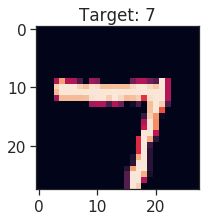

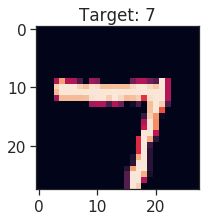

In [0]:
plotExample = 1138
normFactor = 255.0
parseFlag = True

trainset = MNIST('mnist', train=True, download=True, transform=ToTensor())
train_data, val_data, train_labels, val_labels = train_test_split(trainset.data.numpy(), trainset.targets.numpy(), test_size = 10000, random_state = seed)

testset = MNIST('mnist', train=False, transform=ToTensor())
test_data, test_labels = testset.data, testset.targets

if parseFlag == False:
  train_data = torch.tensor(train_data)
  val_data = torch.tensor(val_data)
  test_data = torch.tensor(test_data)
  train_labels = torch.tensor(train_labels)
  val_labels = torch.tensor(val_labels)
  test_labels = torch.tensor(test_labels)

else:
  train_data = torch.tensor(train_data, dtype = torch.float)
  val_data = torch.tensor(val_data, dtype = torch.float)
  test_data = torch.tensor(test_data, dtype = torch.float)
  train_labels = torch.tensor(train_labels)
  val_labels = torch.tensor(val_labels)
  test_labels = torch.tensor(test_labels)

print('Cantidad de ejemplos de entrenamiento: {}'.format(len(train_data)))
print('Cantidad de ejemplos de validación: {}'.format(len(val_data)))
print('Cantidad de ejemplos de prueba: {}\n'.format(len(test_data)))

print('Shape original ejemplos de entrenamiento: {}'.format(train_data.shape))
print('Shape original ejemplos de validación: {}'.format(val_data.shape))
print('Shape original ejemplos de prueba: {}\n'.format(test_data.shape))

fig, axs = plt.subplots(nrows = 1, sharey = True, figsize = (3, 3))
img = train_data[plotExample]
axs.set_title("Target: {}".format(train_labels[plotExample]))
axs.imshow(img.view(28,28).numpy())

print('Valor máximo antes de normalizar: {}\n'.format(torch.max(train_data[plotExample])))

train_data = torch.flatten(train_data, start_dim = 1) / normFactor
val_data = torch.flatten(val_data, start_dim = 1) / normFactor
test_data = torch.flatten(test_data, start_dim = 1) / normFactor

print('Shape ejemplos de entrenamiento (flatten): {}'.format(train_data.shape))
print('Shape ejemplos de validación (flatten): {}'.format(val_data.shape))
print('Shape ejemplos de prueba (flatten): {}\n'.format(test_data.shape))

fig, axs = plt.subplots(nrows = 1, sharey = True, figsize = (3, 3))
img = train_data[plotExample]
axs.set_title("Target: {}".format(train_labels[plotExample]))
axs.imshow(img.view(28,28).numpy())

print('Valor máximo después de normalizar: {}\n'.format(torch.max(train_data[plotExample])))

b)    Investigue al menos $3$ algoritmos de optimización utilizados para el entrenamiento de redes neuronales y compárelos con el gradiente descendente vainilla en términos algorítmicos, de hiperparámetros, etc. Seleccione un algoritmo para utilizarlo en su tarea y fundamente su elección.

c)    Construya una clase *MLP* que le permita agregar capas y regularizadores en el constructor. Es decir, al instanciar la clase debe poder ingresar el número de capas, neuronas por capa y opciones extras como regularización o *dropout*.

In [0]:
class MLP(torch.nn.Module):
  
  def __init__(self, F, l_h, l_a, C, dropout = None, L2 = 0):
    super(MLP, self).__init__()
    
    self.l_a = l_a
    if dropout != None:
      self.dropout = torch.nn.Dropout(dropout)
    else:
      self.dropout = None
    self.L2 = L2
    
    self.hidden = torch.nn.ModuleList()
    self.hidden.append(torch.nn.Linear(F, l_h[0], bias = True))
    for layer in range(0, len(l_h) - 1):
      self.hidden.append(torch.nn.Linear(l_h[layer], l_h[layer + 1], bias = True))
    self.hidden.append(torch.nn.Linear(l_h[len(l_h) - 1], C, bias = True))
    
  def setDropout(self, dropout):
    self.dropout = torch.nn.Dropout(dropout)
    
  def setL2(self, L2):
    self.L2 = L2
  
  def getDropout(self):
    return self.dropout
    
  def getL2(self):
    return self.L2
  
  def forward(self, x):
    for i in range(0, len(self.hidden)):
      if i == 0:
        x = self.l_a[i](self.hidden[i](x))
        if self.dropout != None:
          m = torch.nn.Dropout(0.2)
          x = m(x)
        
      elif i == len(self.hidden) - 1:
        x = self.hidden[i](x)
        x = torch.nn.Softmax(dim = 1)(x)
          
      else:
        x = self.l_a[i](self.hidden[i](x))
        if self.dropout != None:
          x = self.dropout(x)
    
    return x

d)    Entrene y pruebe las siguientes arquitecturas:


1.   *MLP* de $1$ capa.
2.   *MLP* de $2$ capas.
3.   *MLP* de $1$ capa con regularización $L2$.
4.  *MLP* de $1$ capa con regularización *dropout* en capa oculta.

Comente lo que sucede durante el entrenamiento con la función de costo, muestre como cambia en función de las épocas y analice el resultado de clasificación en base a la matriz de confusión.

¿Qué puede decir sobre la regularización en cada caso?¿Cómo afecta el número de parámetros de los modelos bajo estudio?

Utilizando el conjunto de validación guarde* el mejor modelo obtenido durante el entrenamiento y compare las métricas de desempeño en el conjunto de *test*, en base al mejor modelo en cada caso.

**Observaciones**: En cuanto a los demás parámetros de red, tales como función de activación, cantidad de neuronas por capa y tazas de aprendizaje se recomienda:



*   Utilice al rededor de $100$ neuronas por capa.
*   Entrene un número cercano a $20$ épocas.
*   Se recomienda utilizar funciones de activación $ReLU$.
*   Dada esa función de activación, se recomienda una tasa de aprendizaje del orden de $l_r = 2\times10^{-4}$.
*   Se recomienda un tamaño de *batch* $batch_{size} = 100$.
*   $*$: Para guardar y cargar modelos en ```pytorch``` revise [https://pytorch.org/tutorials/beginner/saving_loading_models.html](https://pytorch.org/tutorials/beginner/saving_loading_models.html).



In [0]:
#Source:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize = (8,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

In [0]:
class customDataLoader():
  
  def __init__(self, data, labels, batch_size):
    self.data = data
    self.labels = labels
    self.batch_size = batch_size
  
  def __len__(self):
    return int(self.data.size()[0])
  
  def batches(self):
    B = self.batch_size
    maxIter = int(len(self)/B)
    batch = []
    for i in range(0, maxIter):
      dataBatch = self.data[i*B:(i+1)*B]
      labelBatch = self.labels[i*B:(i+1)*B]
      batch.append([dataBatch, labelBatch])
    return batch

In [0]:
def trainMLP(net, data, labels, lossFunction, optimizer, nEpochs, batchSize):
  netLoss = []
  netAccuracy = []
  net.train()
  for epoch in range(1, nEpochs + 1):
    epochLoss = 0.0
    epochAccuracy = 0.0
    iterations = 0.0
    for dataBatch, labelBatch in customDataLoader(data, labels, batchSize).batches():
      optimizer.zero_grad()
      prediction = net.forward(dataBatch)
      loss = lossFunction(prediction, labelBatch)
      loss.backward()
      optimizer.step()
      epochLoss += loss.item()
      _, predictionIndex = torch.max(prediction, 1)
      iterations += labelBatch.shape[0]
      epochAccuracy += (predictionIndex == labelBatch).sum().item()
    netLoss.append(epochLoss / iterations)
    netAccuracy.append(epochAccuracy / iterations)
  return net, netLoss, netAccuracy

### MLP 1 capa

In [0]:
base_l_h = 100
neuronMult = 2
nHLayers = 1
batchSize = 100
actFunction = torch.nn.ReLU()
nEpochs = 20

F = train_data.shape[1]; C = 10
l_h = [neuronMult * base_l_h] * nHLayers
l_a = [actFunction] * nHLayers

Net1 = MLP(F, l_h, l_a, C)
lossFunction = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(Net1.parameters(), lr = 0.01, weight_decay = Net1.getL2())

Net1, loss1, acc1 = trainMLP(Net1, train_data, train_labels, lossFunction, optimizer, nEpochs, batchSize)

In [0]:
Net1.eval()

train_acc1 = acc1[-1]

y_val = val_labels.numpy()
y_pred = Net1.forward(val_data).detach()
_, y_pred = torch.max(y_pred, 1)
val_acc1 = (y_pred.numpy() == y_val).sum() / y_val.shape[0]

y_test = test_labels.numpy()
y_pred = Net1.forward(test_data).detach()
_, y_pred = torch.max(y_pred, 1)
test_acc1 = (y_pred.numpy() == y_test).sum() / y_test.shape[0]

print('---- MLP 1 capa ----')
print('Precisión - Entrenamiento: {0:.2f}%'.format(train_acc1 * 100))
print('Precisión - Validación: {0:.2f}%'.format(val_acc1 * 100))
print('Precisión - Prueba: {0:.2f}%\n'.format(test_acc1 * 100))

---- MLP 1 capa ----
Precisión - Entrenamiento: 97.19%
Precisión - Validación: 96.16%
Precisión - Prueba: 96.43%



### MLP 2 capas

In [0]:
base_l_h = 100
neuronMult = 2
nHLayers = 2
batchSize = 100
actFunction = torch.nn.ReLU()
nEpochs = 20

F = train_data.shape[1]; C = 10
l_h = [neuronMult * base_l_h] * nHLayers
l_a = [actFunction] * nHLayers

Net2 = MLP(F, l_h, l_a, C)
lossFunction = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(Net2.parameters(), lr = 0.01, weight_decay = Net2.getL2())

Net2, loss2, acc2 = trainMLP(Net2, train_data, train_labels, lossFunction, optimizer, nEpochs, batchSize)

In [0]:
Net2.eval()

train_acc2 = acc2[-1]

y_val = val_labels.numpy()
y_pred = Net2.forward(val_data).detach()
_, y_pred = torch.max(y_pred, 1)
val_acc2 = (y_pred.numpy() == y_val).sum() / y_val.shape[0]

y_test = test_labels.numpy()
y_pred = Net2.forward(test_data).detach()
_, y_pred = torch.max(y_pred, 1)
test_acc2 = (y_pred.numpy() == y_test).sum() / y_test.shape[0]

print('---- MLP 2 capas ----')
print('Precisión - Entrenamiento: {0:.2f}%'.format(train_acc2 * 100))
print('Precisión - Validación: {0:.2f}%'.format(val_acc2 * 100))
print('Precisión - Prueba: {0:.2f}%\n'.format(test_acc2 * 100))

---- MLP 2 capas ----
Precisión - Entrenamiento: 98.42%
Precisión - Validación: 97.05%
Precisión - Prueba: 97.04%



### MLP 1 capa con Regularización L2

In [0]:
base_l_h = 100
neuronMult = 2
nHLayers = 1
batchSize = 100
actFunction = torch.nn.ReLU()
nEpochs = 20

F = train_data.shape[1]; C = 10
l_h = [neuronMult * base_l_h] * nHLayers
l_a = [actFunction] * nHLayers

L2weights = [0.0001, 0.001, 0.01]
Nets3 = []
lossTrials3 = []
accTrials3 =  []
select3 = []
count = 1
for weight in L2weights:
  Net3 = MLP(F, l_h, l_a, C, L2 = weight)
  lossFunction = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Adagrad(Net3.parameters(), lr = 0.01, weight_decay = Net3.getL2())
  Net3, loss3, acc3 = trainMLP(Net3, train_data, train_labels, lossFunction, optimizer, nEpochs, batchSize)
  
  lossTrials3.append(loss3)
  accTrials3.append(acc3)
  
  Net3.eval()

  train_acc3 = acc3[-1]

  y_val = val_labels.numpy()
  y_pred = Net3.forward(val_data).detach()
  _, y_pred = torch.max(y_pred, 1)
  val_acc3 = (y_pred.numpy() == y_val).sum() / y_val.shape[0]
  select3.append(val_acc3)
  
  y_test = test_labels.numpy()
  y_pred = Net3.forward(test_data).detach()
  _, y_pred = torch.max(y_pred, 1)
  test_acc3 = (y_pred.numpy() == y_test).sum() / y_test.shape[0]
  
  #modelName = 'L2_{}.pth'.format(count)
  #with open(modelFolder + modelName, 'wb') as f:
  #  torch.save(Net3, f)
  Nets3.append(Net3)
  count += 1
  
  print('---- Peso de la Regularización: {} ----'.format(weight))
  print('Precisión - Entrenamiento: {0:.2f}%'.format(train_acc3 * 100))
  print('Precisión - Validación: {0:.2f}%'.format(val_acc3 * 100))
  print('Precisión - Prueba: {0:.2f}%\n'.format(test_acc3 * 100))

---- Peso de la Regularización: 0.0001 ----
Precisión - Entrenamiento: 96.95%
Precisión - Validación: 96.04%
Precisión - Prueba: 96.12%

---- Peso de la Regularización: 0.001 ----
Precisión - Entrenamiento: 95.58%
Precisión - Validación: 95.22%
Precisión - Prueba: 95.32%

---- Peso de la Regularización: 0.01 ----
Precisión - Entrenamiento: 89.76%
Precisión - Validación: 90.46%
Precisión - Prueba: 90.59%



In [0]:
minAcc = 0
for i in range(0,len(L2weights)):
  if select3[i] >= minAcc:
    minAcc = select3[i]
    index3 = i

Net3 = Nets3[index3]
loss3, acc3 = lossTrials3[index3], accTrials3[index3]

### MLP 1 capa con Dropout

In [0]:
base_l_h = 100
neuronMult = 2
nHLayers = 1
batchSize = 100
actFunction = torch.nn.ReLU()
nEpochs = 20

F = train_data.shape[1]; C = 10
l_h = [neuronMult * base_l_h] * nHLayers
l_a = [actFunction] * nHLayers

probs = [0.3, 0.5, 0.8]
Nets4 = []
lossTrials4 = []
accTrials4 =  []
select4 = []
count = 1
for p in probs:
  Net4 = MLP(F, l_h, l_a, C, dropout = p)
  lossFunction = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Adagrad(Net4.parameters(), lr = 0.01, weight_decay = Net4.getL2())
  Net4, loss4, acc4 = trainMLP(Net4, train_data, train_labels, lossFunction, optimizer, nEpochs, batchSize)
  
  lossTrials4.append(loss4)
  accTrials4.append(acc4)
  
  Net4.eval()

  train_acc4 = acc4[-1]

  y_val = val_labels.numpy()
  y_pred = Net4.forward(val_data).detach()
  _, y_pred = torch.max(y_pred, 1)
  val_acc4 = (y_pred.numpy() == y_val).sum() / y_val.shape[0]
  select4.append(val_acc4)
  
  y_test = test_labels.numpy()
  y_pred = Net4.forward(test_data).detach()
  _, y_pred = torch.max(y_pred, 1)
  test_acc4 = (y_pred.numpy() == y_test).sum() / y_test.shape[0]
  
  #modelName = 'Dropout_{}.pth'.format(count)
  #with open(modelFolder + modelName, 'wb') as f:
  #  torch.save(Net4, f)
  Nets4.append(Net4)
  count += 1
  
  print('---- Probabilidad de Dropout: {} ----'.format(p))
  print('Precisión - Entrenamiento: {0:.2f}%'.format(train_acc4 * 100))
  print('Precisión - Validación: {0:.2f}%'.format(val_acc4 * 100))
  print('Precisión - Prueba: {0:.2f}%\n'.format(test_acc4 * 100))

---- Probabilidad de Dropout: 0.3 ----
Precisión - Entrenamiento: 96.32%
Precisión - Validación: 95.80%
Precisión - Prueba: 95.75%

---- Probabilidad de Dropout: 0.5 ----
Precisión - Entrenamiento: 96.60%
Precisión - Validación: 95.87%
Precisión - Prueba: 96.03%

---- Probabilidad de Dropout: 0.8 ----
Precisión - Entrenamiento: 96.66%
Precisión - Validación: 95.99%
Precisión - Prueba: 96.02%



In [0]:
minAcc = 0
for i in range(0,len(probs)):
  if select4[i] >= minAcc:
    minAcc = select4[i]
    index4 = i

Net4 = Nets4[index4]
loss4, acc4 = lossTrials4[index4], accTrials4[index4]

### Gráficos

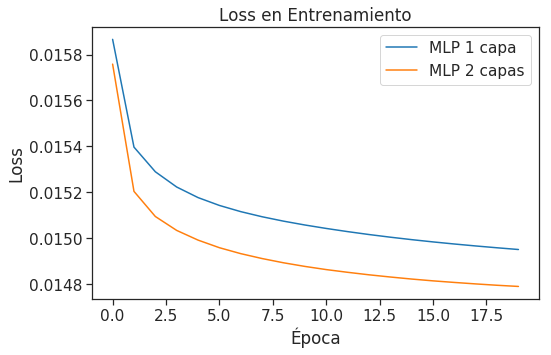

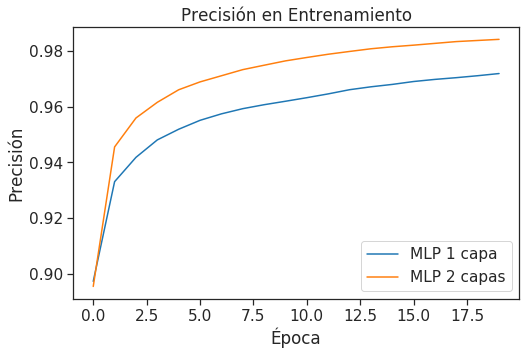

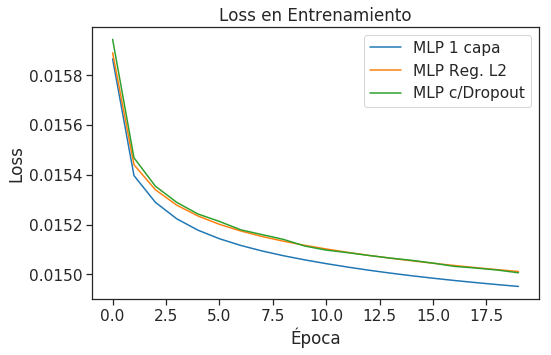

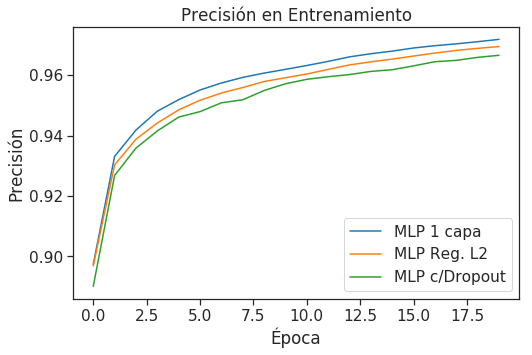

In [0]:
plt.figure(figsize = (8,5))
plt.plot(loss1, label = "MLP 1 capa")
plt.plot(loss2, label = "MLP 2 capas")
plt.title("Loss en Entrenamiento")
plt.legend()
plt.xlabel("Época")
plt.ylabel("Loss")
fileName = './lossCapas.png'
plt.savefig(fileName, dpi = dpi)
files.download(fileName)
plt.show()

plt.figure(figsize = (8,5))
plt.plot(acc1, label = "MLP 1 capa")
plt.plot(acc2, label = "MLP 2 capas")
plt.title("Precisión en Entrenamiento")
plt.legend()
plt.xlabel("Época")
plt.ylabel("Precisión")
fileName = './accCapas.png'
plt.savefig(fileName, dpi = dpi)
files.download(fileName)
plt.show()

plt.figure(figsize = (8,5))
plt.plot(loss1, label = "MLP 1 capa")
plt.plot(loss3, label = "MLP Reg. L2")
plt.plot(loss4, label = "MLP c/Dropout")
plt.title("Loss en Entrenamiento")
plt.legend()
plt.xlabel("Época")
plt.ylabel("Loss")
fileName = './lossReg.png'
plt.savefig(fileName, dpi = dpi)
files.download(fileName)
plt.show()

plt.figure(figsize = (8,5))
plt.plot(acc1, label = "MLP 1 capa")
plt.plot(acc3, label = "MLP Reg. L2")
plt.plot(acc4, label = "MLP c/Dropout")
plt.title("Precisión en Entrenamiento")
plt.legend()
plt.xlabel("Época")
plt.ylabel("Precisión")
fileName = './accReg.png'
plt.savefig(fileName, dpi = dpi)
files.download(fileName)
plt.show()

Normalized confusion matrix
[[9.90e-01 0.00e+00 0.00e+00 1.02e-03 0.00e+00 3.06e-03 3.06e-03 1.02e-03
  2.04e-03 0.00e+00]
 [0.00e+00 9.85e-01 4.41e-03 0.00e+00 8.81e-04 8.81e-04 2.64e-03 8.81e-04
  5.29e-03 0.00e+00]
 [5.81e-03 0.00e+00 9.53e-01 6.78e-03 7.75e-03 9.69e-04 5.81e-03 7.75e-03
  1.07e-02 1.94e-03]
 [9.90e-04 9.90e-04 8.91e-03 9.57e-01 0.00e+00 2.97e-03 0.00e+00 9.90e-03
  1.49e-02 3.96e-03]
 [1.02e-03 0.00e+00 4.07e-03 0.00e+00 9.64e-01 0.00e+00 8.15e-03 1.02e-03
  4.07e-03 1.73e-02]
 [3.36e-03 1.12e-03 0.00e+00 1.12e-02 2.24e-03 9.59e-01 8.97e-03 2.24e-03
  8.97e-03 3.36e-03]
 [8.35e-03 3.13e-03 1.04e-03 1.04e-03 4.18e-03 1.04e-02 9.66e-01 1.04e-03
  5.22e-03 0.00e+00]
 [9.73e-04 7.78e-03 1.36e-02 2.92e-03 9.73e-04 9.73e-04 0.00e+00 9.64e-01
  2.92e-03 5.84e-03]
 [4.11e-03 2.05e-03 2.05e-03 1.13e-02 6.16e-03 2.05e-03 2.05e-03 4.11e-03
  9.61e-01 5.13e-03]
 [6.94e-03 5.95e-03 9.91e-04 1.19e-02 1.29e-02 4.96e-03 9.91e-04 6.94e-03
  5.95e-03 9.43e-01]]


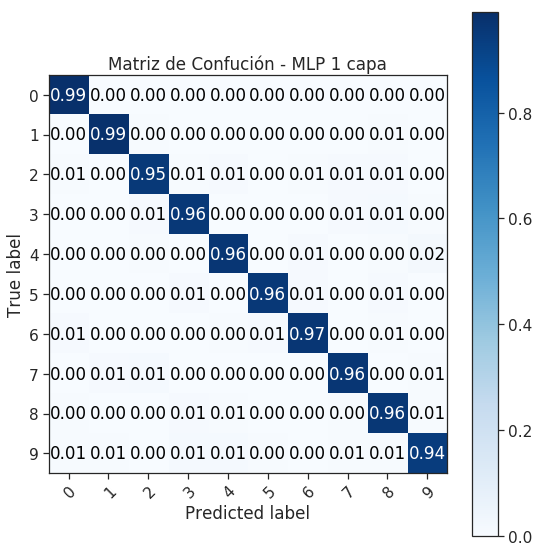

Normalized confusion matrix
[[9.90e-01 0.00e+00 1.02e-03 2.04e-03 0.00e+00 1.02e-03 1.02e-03 3.06e-03
  2.04e-03 0.00e+00]
 [0.00e+00 9.87e-01 3.52e-03 1.76e-03 0.00e+00 8.81e-04 2.64e-03 8.81e-04
  3.52e-03 0.00e+00]
 [7.75e-03 9.69e-04 9.63e-01 6.78e-03 2.91e-03 9.69e-04 2.91e-03 7.75e-03
  6.78e-03 0.00e+00]
 [9.90e-04 0.00e+00 6.93e-03 9.73e-01 9.90e-04 2.97e-03 0.00e+00 6.93e-03
  6.93e-03 9.90e-04]
 [1.02e-03 0.00e+00 4.07e-03 0.00e+00 9.73e-01 0.00e+00 6.11e-03 2.04e-03
  2.04e-03 1.22e-02]
 [5.61e-03 0.00e+00 0.00e+00 1.01e-02 1.12e-03 9.64e-01 1.01e-02 2.24e-03
  3.36e-03 3.36e-03]
 [7.31e-03 2.09e-03 1.04e-03 1.04e-03 4.18e-03 4.18e-03 9.73e-01 0.00e+00
  7.31e-03 0.00e+00]
 [9.73e-04 4.86e-03 9.73e-03 4.86e-03 9.73e-04 0.00e+00 0.00e+00 9.69e-01
  2.92e-03 6.81e-03]
 [6.16e-03 0.00e+00 1.03e-03 1.03e-02 3.08e-03 5.13e-03 3.08e-03 5.13e-03
  9.60e-01 6.16e-03]
 [5.95e-03 4.96e-03 9.91e-04 9.91e-03 1.49e-02 3.96e-03 0.00e+00 5.95e-03
  2.97e-03 9.50e-01]]


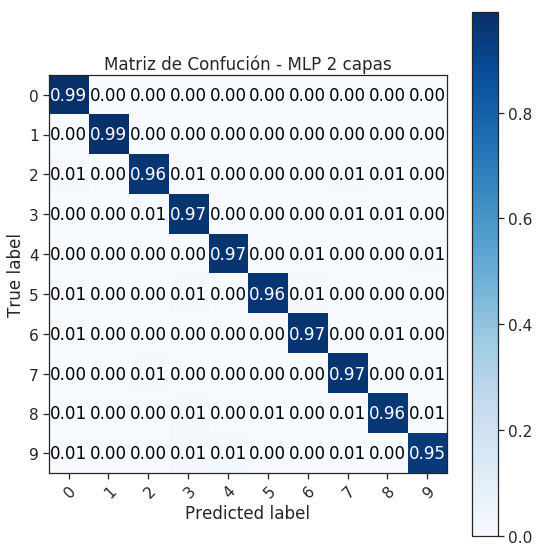

Normalized confusion matrix
[[9.88e-01 0.00e+00 1.02e-03 1.02e-03 0.00e+00 4.08e-03 4.08e-03 1.02e-03
  1.02e-03 0.00e+00]
 [0.00e+00 9.81e-01 3.52e-03 8.81e-04 8.81e-04 8.81e-04 2.64e-03 1.76e-03
  7.93e-03 0.00e+00]
 [6.78e-03 9.69e-04 9.54e-01 5.81e-03 6.78e-03 0.00e+00 3.88e-03 6.78e-03
  1.36e-02 9.69e-04]
 [0.00e+00 0.00e+00 7.92e-03 9.63e-01 0.00e+00 4.95e-03 9.90e-04 8.91e-03
  1.39e-02 0.00e+00]
 [1.02e-03 1.02e-03 3.05e-03 0.00e+00 9.61e-01 0.00e+00 8.15e-03 2.04e-03
  3.05e-03 2.04e-02]
 [7.85e-03 1.12e-03 1.12e-03 1.57e-02 1.12e-03 9.45e-01 1.01e-02 2.24e-03
  1.12e-02 4.48e-03]
 [1.04e-02 3.13e-03 3.13e-03 1.04e-03 6.26e-03 8.35e-03 9.62e-01 1.04e-03
  4.18e-03 0.00e+00]
 [9.73e-04 6.81e-03 1.85e-02 3.89e-03 1.95e-03 9.73e-04 0.00e+00 9.56e-01
  4.86e-03 5.84e-03]
 [3.08e-03 1.03e-03 3.08e-03 1.03e-02 5.13e-03 4.11e-03 3.08e-03 6.16e-03
  9.60e-01 4.11e-03]
 [6.94e-03 5.95e-03 9.91e-04 1.19e-02 1.68e-02 4.96e-03 9.91e-04 8.92e-03
  5.95e-03 9.37e-01]]


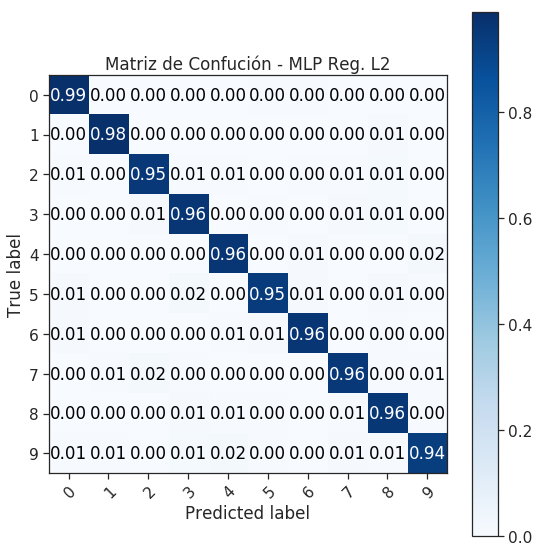

Normalized confusion matrix
[[9.92e-01 0.00e+00 0.00e+00 1.02e-03 0.00e+00 1.02e-03 2.04e-03 1.02e-03
  2.04e-03 1.02e-03]
 [0.00e+00 9.81e-01 3.52e-03 2.64e-03 0.00e+00 8.81e-04 2.64e-03 1.76e-03
  7.05e-03 0.00e+00]
 [6.78e-03 0.00e+00 9.59e-01 5.81e-03 4.84e-03 9.69e-04 3.88e-03 7.75e-03
  1.07e-02 0.00e+00]
 [9.90e-04 0.00e+00 9.90e-03 9.53e-01 9.90e-04 5.94e-03 1.98e-03 8.91e-03
  1.39e-02 3.96e-03]
 [1.02e-03 0.00e+00 5.09e-03 0.00e+00 9.61e-01 0.00e+00 5.09e-03 3.05e-03
  5.09e-03 1.93e-02]
 [3.36e-03 1.12e-03 1.12e-03 1.79e-02 2.24e-03 9.47e-01 1.12e-02 0.00e+00
  1.12e-02 4.48e-03]
 [8.35e-03 2.09e-03 2.09e-03 2.09e-03 3.13e-03 8.35e-03 9.72e-01 0.00e+00
  2.09e-03 0.00e+00]
 [9.73e-04 6.81e-03 1.56e-02 3.89e-03 1.95e-03 9.73e-04 0.00e+00 9.55e-01
  3.89e-03 1.07e-02]
 [3.08e-03 4.11e-03 9.24e-03 1.13e-02 7.19e-03 4.11e-03 5.13e-03 6.16e-03
  9.44e-01 6.16e-03]
 [6.94e-03 5.95e-03 0.00e+00 7.93e-03 1.39e-02 4.96e-03 9.91e-04 9.91e-03
  9.91e-03 9.40e-01]]


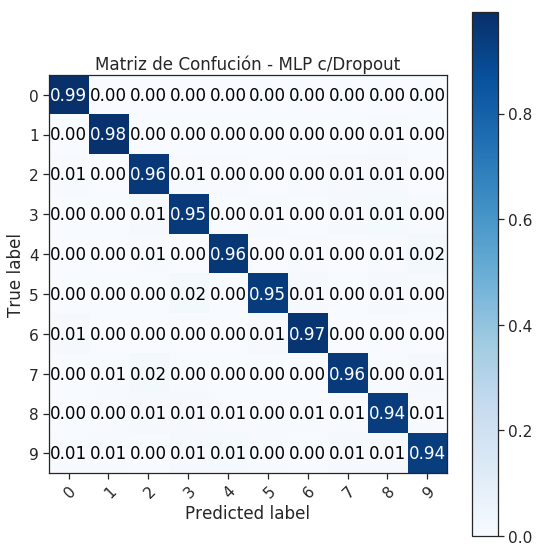

In [0]:
Net1.eval()
y_test = test_labels.numpy()
y_pred = Net1.forward(test_data).detach()
_, y_pred = torch.max(y_pred, 1)

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes = np.arange(0,10).astype(str), normalize=True,
                      title='Matriz de Confución - MLP 1 capa')
fileName = './CM1.png'
plt.savefig(fileName, dpi = dpi)
files.download(fileName)
plt.show()

Net2.eval()
y_test = test_labels.numpy()
y_pred = Net2.forward(test_data).detach()
_, y_pred = torch.max(y_pred, 1)

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes = np.arange(0,10).astype(str), normalize=True,
                      title='Matriz de Confución - MLP 2 capas')
fileName = './CM2.png'
plt.savefig(fileName, dpi = dpi)
files.download(fileName)
plt.show()

Net3.eval()
y_test = test_labels.numpy()
y_pred = Net3.forward(test_data).detach()
_, y_pred = torch.max(y_pred, 1)

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes = np.arange(0,10).astype(str), normalize=True,
                      title='Matriz de Confución - MLP Reg. L2')
fileName = './CM3.png'
plt.savefig(fileName, dpi = dpi)
files.download(fileName)
plt.show()

Net4.eval()
y_test = test_labels.numpy()
y_pred = Net4.forward(test_data).detach()
_, y_pred = torch.max(y_pred, 1)

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes = np.arange(0,10).astype(str), normalize=True,
                      title='Matriz de Confución - MLP c/Dropout')
fileName = './CM4.png'
plt.savefig(fileName, dpi = dpi)
files.download(fileName)
plt.show()

In [0]:
Net1.eval()

train_acc1 = acc1[-1]

y_val = val_labels.numpy()
y_pred = Net1.forward(val_data).detach()
_, y_pred = torch.max(y_pred, 1)
val_acc1 = (y_pred.numpy() == y_val).sum() / y_val.shape[0]

y_test = test_labels.numpy()
y_pred = Net1.forward(test_data).detach()
_, y_pred = torch.max(y_pred, 1)
test_acc1 = (y_pred.numpy() == y_test).sum() / y_test.shape[0]

print('---- MLP 1 capa ----')
print('Precisión - Entrenamiento: {0:.2f}%'.format(train_acc1 * 100))
print('Precisión - Validación: {0:.2f}%'.format(val_acc1 * 100))
print('Precisión - Prueba: {0:.2f}%\n'.format(test_acc1 * 100))

Net2.eval()

train_acc2 = acc2[-1]

y_val = val_labels.numpy()
y_pred = Net2.forward(val_data).detach()
_, y_pred = torch.max(y_pred, 1)
val_acc2 = (y_pred.numpy() == y_val).sum() / y_val.shape[0]

y_test = test_labels.numpy()
y_pred = Net2.forward(test_data).detach()
_, y_pred = torch.max(y_pred, 1)
test_acc2 = (y_pred.numpy() == y_test).sum() / y_test.shape[0]

print('---- MLP 2 capas ----')
print('Precisión - Entrenamiento: {0:.2f}%'.format(train_acc2 * 100))
print('Precisión - Validación: {0:.2f}%'.format(val_acc2 * 100))
print('Precisión - Prueba: {0:.2f}%\n'.format(test_acc2 * 100))

Net3.eval()

train_acc3 = acc3[-1]

y_val = val_labels.numpy()
y_pred = Net3.forward(val_data).detach()
_, y_pred = torch.max(y_pred, 1)
val_acc3 = (y_pred.numpy() == y_val).sum() / y_val.shape[0]

y_test = test_labels.numpy()
y_pred = Net3.forward(test_data).detach()
_, y_pred = torch.max(y_pred, 1)
test_acc3 = (y_pred.numpy() == y_test).sum() / y_test.shape[0]

print('---- MLP con peso de Regularización L2: {} ----'.format(L2weights[index3]))
print('Precisión - Entrenamiento: {0:.2f}%'.format(train_acc3 * 100))
print('Precisión - Validación: {0:.2f}%'.format(val_acc3 * 100))
print('Precisión - Prueba: {0:.2f}%\n'.format(test_acc3 * 100))

Net4.eval()

train_acc4 = acc4[-1]

y_val = val_labels.numpy()
y_pred = Net4.forward(val_data).detach()
_, y_pred = torch.max(y_pred, 1)
val_acc4 = (y_pred.numpy() == y_val).sum() / y_val.shape[0]

y_test = test_labels.numpy()
y_pred = Net4.forward(test_data).detach()
_, y_pred = torch.max(y_pred, 1)
test_acc4 = (y_pred.numpy() == y_test).sum() / y_test.shape[0]

print('---- MLP con probabilidad de Dropout: {} ----'.format(probs[index4]))
print('Precisión - Entrenamiento: {0:.2f}%'.format(train_acc4 * 100))
print('Precisión - Validación: {0:.2f}%'.format(val_acc4 * 100))
print('Precisión - Prueba: {0:.2f}%\n'.format(test_acc4 * 100))

---- MLP 1 capa ----
Precisión - Entrenamiento: 97.19%
Precisión - Validación: 96.16%
Precisión - Prueba: 96.43%

---- MLP 2 capas ----
Precisión - Entrenamiento: 98.42%
Precisión - Validación: 97.05%
Precisión - Prueba: 97.04%

---- MLP con peso de Regularización L2: 0.0001 ----
Precisión - Entrenamiento: 96.95%
Precisión - Validación: 96.04%
Precisión - Prueba: 96.12%

---- MLP con probabilidad de Dropout: 0.8 ----
Precisión - Entrenamiento: 96.66%
Precisión - Validación: 95.93%
Precisión - Prueba: 96.06%



## Ensayos

A partir de este punto se muestran pruebas para verificar la implementación de los algoritmos.

In [0]:
%%script false 
base_l_h = 100
neuronMult = 2
nHLayers = 2
batchSize = 100
actFunction = torch.nn.ReLU()
nEpochs = 20

F = train_data.shape[1]; C = 10
l_h = [neuronMult * base_l_h] * nHLayers
l_a = [actFunction] * nHLayers

Net1 = MLP(F, l_h, l_a, C)

lossFunction = torch.nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(Net1.parameters(), lr = 2 * 1e-2, weight_decay = Net1.getL2())
#optimizer = torch.optim.RMSprop(Net1.parameters(), lr = 0.01, alpha = 0.99, eps = 1e-08, weight_decay = Net1.getL2())
optimizer = torch.optim.Adagrad(Net1.parameters(), lr = 0.01, weight_decay = Net1.getL2())

print(Net1.hidden[0].weight)
Net1, loss1, acc1 = trainMLP(Net1, train_data, train_labels, lossFunction, optimizer, nEpochs, batchSize)
print(Net1.hidden[0].weight)

In [0]:
%%script false 
plt.figure()
plt.plot(loss1, label = "Net 1")
plt.title("Loss over training")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.figure()
plt.plot(acc1, label = "Net 1")
plt.title("Accuracy over training: {0:.0f}%".format(acc1[-1] * 100))
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [0]:
%%script false 
Net1.eval()
y_test = test_labels.numpy()
y_pred = Net1.forward(test_data).detach()
_, y_pred = torch.max(y_pred, 1)

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes = np.arange(0,10).astype(str), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [0]:
%%script false 

base_l_h = 100
neuronMult = 1
nHLayers = 2
batchSize = 10000
actFunction = torch.nn.ReLU()
nEpochs = 1

F = train_data.shape[1]; C = 10
l_h = [neuronMult * base_l_h] * nHLayers
l_a = [actFunction] * nHLayers

net = MLP(F, l_h, l_a, C)

lossFunction = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(Net1.parameters(), lr = 2 * 1e-4, weight_decay = Net1.getL2())

try:
  net.gpu()
except Exception:
  pass
optimizer.zero_grad()
netLoss = []
netAccuracy = []
for epoch in range(1, nEpochs+1):
  loss = 0
  accuracy = 0
  iteration = 0
  for dataBatch, labelBatch in customDataLoader(train_data, train_labels, batchSize).batches():
    prediction = net.forward(dataBatch)
    print(prediction.shape)
    _, predictionIndex = torch.max(prediction, 1)
    print(predictionIndex)

## Código Auxiliar

In [0]:
%%script false 

# Descargar gráficos desde Colaboratory

'''
import matplotlib.pyplot as plt
from google.colab import files

test = plt.figure()
plt.plot([[1, 2, 3], [5, 2, 3]])
plt.savefig('test.pdf')

files.download('test.pdf')
'''